In [1]:
import pandas as pd
import numpy as np

datasets = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profits'])
print(datasets)

    Population   Profits
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


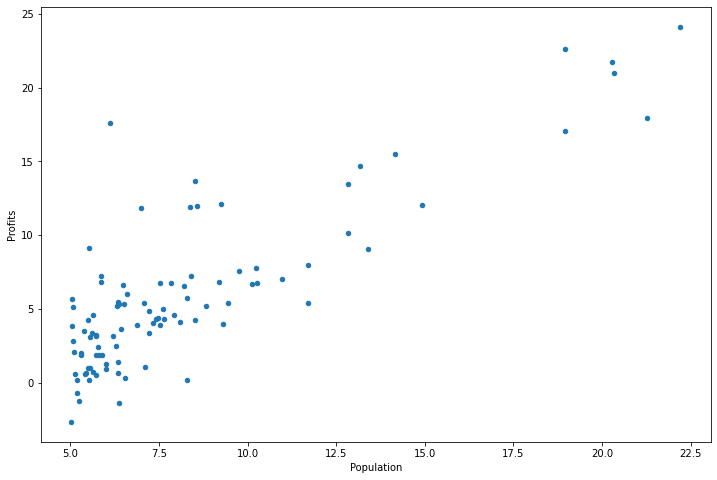

In [2]:
from matplotlib import pyplot as plt
datasets.plot(kind='scatter',x='Population',y='Profits',figsize=(12,8))
plt.show()

In [3]:
print(datasets.head())

   Population  Profits
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [4]:
print(datasets.describe())

       Population    Profits
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


In [5]:
datasets.insert(0, 'Ones', 1)
print(datasets.head())

   Ones  Population  Profits
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


In [6]:
def cost(theta, x, y):
    J = np.power(x * theta.T - y, 2)
    J = np.sum(J) / (len(J)*2)
    return J

In [7]:
cols = datasets.shape[1]
X = datasets.iloc[:,:cols-1]
y = datasets.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [8]:
print(cost(theta,X,y))

32.072733877455676


In [9]:
def gradient_descent(x,y,theta,alpha,iters):
    cost_value_list = []
    update_theta = np.matrix(np.zeros(theta.shape))
    for _ in range(iters):
        for i in range(x.shape[-1]):
            theta_gradient = np.sum(np.array(x * theta.T - y)*np.array(x[:,i]))/len(x)
            update_theta[0,i] -= alpha * theta_gradient
        theta = update_theta
        cost_value = cost(update_theta,x,y)
        cost_value_list.append(cost_value)
    return theta, cost_value_list

In [10]:
theta = np.matrix(np.zeros((1,2)))
theta,cost_value_list = gradient_descent(X,y,theta,0.01,1500)
print(theta)
print(X.ravel().shape)

[[-3.63609474  1.16699229]]
(1, 194)


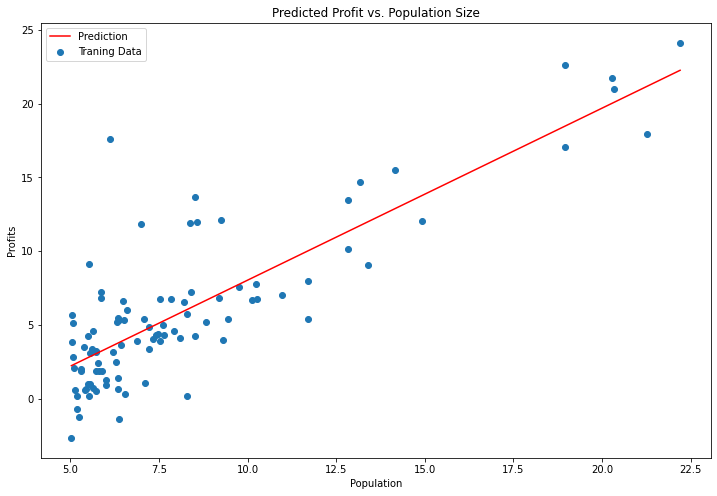

In [11]:
x = np.linspace(datasets.Population.min(),datasets.Population.max(),100)
f = theta[0,0] + x*theta[0,1]
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(datasets.Population, datasets.Profits, label='Traning Data')
ax.legend(loc='best')
ax.set_xlabel('Population')
ax.set_ylabel('Profits')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

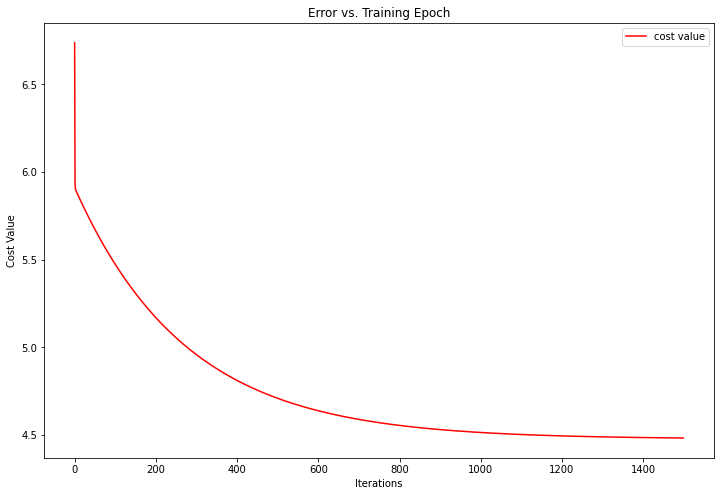

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(cost_value_list,'r',label='cost value')
ax.legend(loc='best')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [13]:
house_datasets = pd.read_csv('ex1data2.txt',header=None,names=['Size','Bedrooms','Price'])
print(house_datasets.head())

   Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


In [14]:
print(house_datasets.describe())
house_datasets = (house_datasets - house_datasets.mean()) / house_datasets.std()

              Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [15]:
house_datasets.insert(0,'Ones',1)
print(house_datasets.head())

   Ones      Size  Bedrooms     Price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389


In [16]:
cols = house_datasets.shape[-1]
X = house_datasets.iloc[:,:cols-1]
y = house_datasets.iloc[:,cols-1:cols]
X = np.mat(X)
y = np.mat(y)

In [17]:
theta = np.mat(np.zeros((1,3)))
print(cost(theta,X,y))

0.4893617021276595


In [18]:
def efficientComputCost(theta,X,y):
    J = (X*theta.T-y).T*(X*theta.T-y)/(2*len(X))
    return J

In [19]:
print(efficientComputCost(theta,X,y))

[[0.4893617]]


In [20]:
theta, cost_value_list = gradient_descent(X,y,theta,0.01,1000)
print(theta)

[[-1.10455380e-16  8.78591756e-01 -4.70181147e-02]]


In [21]:
efficientComputCost(theta,X,y)

matrix([[0.13070286]])

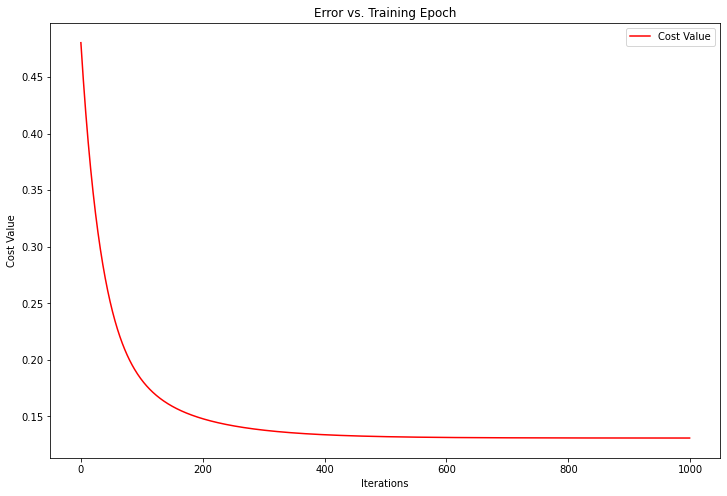

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(cost_value_list,'r',label='Cost Value')
ax.legend(loc='best')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. Training Epoch')
plt.show()

# Normal equation

In [23]:
print(datasets.head())

   Ones  Population  Profits
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


In [24]:
cols = datasets.shape[-1]
X = np.mat(datasets.iloc[:,:cols-1])
y = np.mat(datasets.iloc[:,cols-1:cols])
theta_normal_equation = (X.T*X).I*X.T*y
print(theta_normal_equation)

[[-3.89578088]
 [ 1.19303364]]


In [25]:
theta_gradient_descent = np.mat(np.zeros((1,2)))
theta_gradient_descent,cost_value_list=gradient_descent(X,y,theta_gradient_descent,0.01,1000)
print(theta_gradient_descent)

[[-3.25095985  1.12837093]]


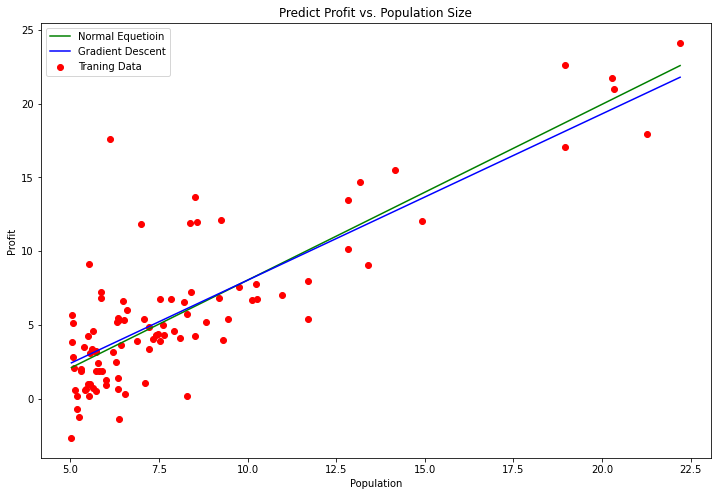

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(datasets.Population, datasets.Profits, c='r', label='Traning Data')
x = np.linspace(datasets.Population.min(),datasets.Population.max(),100)
f_normal_equation = theta_normal_equation[0,0] + x*theta_normal_equation[1,0]
ax.plot(x,f_normal_equation,'g',label='Normal Equetioin')
f_gradient_descent = theta_gradient_descent[0,0] + x*theta_gradient_descent[0,1]
ax.plot(x,f_gradient_descent,'b',label='Gradient Descent')
ax.legend(loc='best')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predict Profit vs. Population Size')
plt.show()

   Ones  Population  Profits
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


In [32]:
cols = datasets.shape[1]
X = datasets.iloc[:,:cols-1]
y = datasets.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)

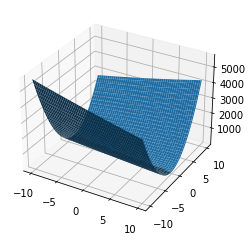

In [54]:
x = np.linspace(-10,10,100)
theta_0, theta_1 = np.meshgrid(x,x)
z = []
for i in range(100):
    for j in range(100):
        z.append(cost(np.mat([[theta_0[i][j],theta_1[i][j]]]),X,y))
z = np.array(z).reshape(100,100)
ax = plt.subplot(111,projection='3d')
ax.plot_surface(theta_0,theta_1,z)
plt.show()